In [1]:
#Título: Reconhecimento de imagens do filme King Kong
#Autor: Fernando Schmitt

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
#Definindo parâmetros 
data= '/home/fernando/Downloads/kingkong'
batch_size= 32
img_height= 100
img_width= 100

In [3]:
train= tf.keras.utils.image_dataset_from_directory(data,
                                                   validation_split= 0.2,
                                                   subset= 'training',
                                                   seed= 123,
                                                   image_size= (img_height, img_width),
                                                   batch_size= batch_size)

Found 480 files belonging to 3 classes.
Using 384 files for training.


In [4]:
validation= tf.keras.utils.image_dataset_from_directory(data,
                                                   validation_split= 0.2,
                                                   subset= 'validation',
                                                   seed= 123,
                                                   image_size= (img_height, img_width),
                                                   batch_size= batch_size)

Found 480 files belonging to 3 classes.
Using 96 files for validation.


In [5]:
#visualizando as classes
classes= train.class_names
classes

['King Kong (1933)', 'King Kong (1976)', 'King Kong (2005)']

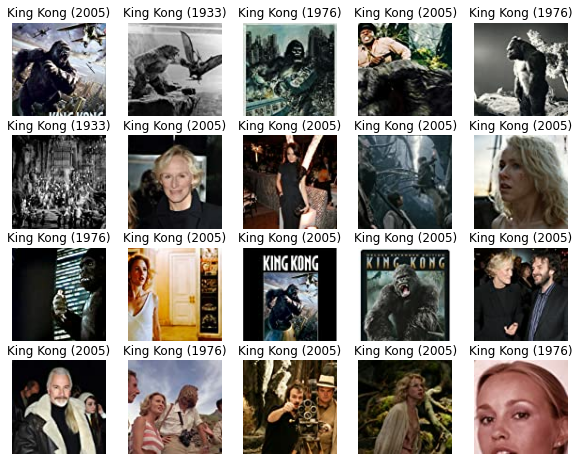

In [6]:
#visualizando os dados
plt.figure(figsize=(10, 10))
for imgs, labels in train.take(1):
    for i in range(20):
        ax= plt.subplot(5,5, i + 1)
        plt.imshow(imgs[i].numpy().astype('uint8'))
        plt.title(classes[labels[i]])
        plt.axis('off')

In [7]:
#Criando a rede para reconhecimento
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [8]:
#melhorando o desempenho da rede neural usando cache e prefetch
tune= tf.data.AUTOTUNE
train= train.cache().shuffle(480).prefetch(buffer_size= tune)
validation= validation.cache().prefetch(buffer_size= tune)


In [9]:
#normalizando os dados para a rede neural no intervalo [0,1]
normal= layers.Rescaling(1./255)

In [10]:
normal_data= train.map(lambda x, y: (normal(x), y))
images_batch, labels_batch= next(iter(normal_data))
first_image= images_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [11]:
#Criando o modelo
num_classes= len(classes)

model= Sequential([
    layers.Rescaling(1./255, input_shape= (img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding= 'same', activation= 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding= 'same', activation= 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding= 'same', activation= 'relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation= 'relu'),
    layers.Dense(num_classes)
])

In [12]:
#Compilando o modelo
model.compile(optimizer= 'adam',
             loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True),
             metrics=['accuracy'])

In [13]:
#Visualizando as camadas do modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 100, 100, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 64)        1

In [14]:
#Treinando o modelo
epochs= 100
train_model= model.fit(train, validation_data= validation, epochs= epochs)

Epoch 1/100
12/12 [==============================] - 4s 195ms/step - loss: 1.1426 - accuracy: 0.4635 - val_loss: 1.0364 - val_accuracy: 0.5208
Epoch 2/100
12/12 [==============================] - 2s 166ms/step - loss: 1.0298 - accuracy: 0.5286 - val_loss: 0.9670 - val_accuracy: 0.5208
Epoch 3/100
12/12 [==============================] - 2s 166ms/step - loss: 0.9542 - accuracy: 0.5677 - val_loss: 0.8845 - val_accuracy: 0.5312
Epoch 4/100
12/12 [==============================] - 2s 165ms/step - loss: 0.8643 - accuracy: 0.6068 - val_loss: 0.9186 - val_accuracy: 0.5208
Epoch 5/100
12/12 [==============================] - 2s 164ms/step - loss: 0.8112 - accuracy: 0.6068 - val_loss: 0.7935 - val_accuracy: 0.6250
Epoch 6/100
12/12 [==============================] - 2s 164ms/step - loss: 0.6994 - accuracy: 0.7083 - val_loss: 0.8488 - val_accuracy: 0.6042
Epoch 7/100
12/12 [==============================] - 2s 165ms/step - loss: 0.5876 - accuracy: 0.7552 - val_loss: 0.7969 - val_accuracy: 0.6562

12/12 [==============================] - 2s 167ms/step - loss: 1.3372e-04 - accuracy: 1.0000 - val_loss: 4.1312 - val_accuracy: 0.5521
Epoch 58/100
12/12 [==============================] - 2s 168ms/step - loss: 1.2761e-04 - accuracy: 1.0000 - val_loss: 4.1403 - val_accuracy: 0.5521
Epoch 59/100
12/12 [==============================] - 2s 168ms/step - loss: 1.2223e-04 - accuracy: 1.0000 - val_loss: 4.1597 - val_accuracy: 0.5521
Epoch 60/100
12/12 [==============================] - 2s 165ms/step - loss: 1.1655e-04 - accuracy: 1.0000 - val_loss: 4.1793 - val_accuracy: 0.5521
Epoch 61/100
12/12 [==============================] - 2s 168ms/step - loss: 1.1178e-04 - accuracy: 1.0000 - val_loss: 4.1877 - val_accuracy: 0.5521
Epoch 62/100
12/12 [==============================] - 2s 167ms/step - loss: 1.0721e-04 - accuracy: 1.0000 - val_loss: 4.2234 - val_accuracy: 0.5521
Epoch 63/100
12/12 [==============================] - 2s 166ms/step - loss: 1.0294e-04 - accuracy: 1.0000 - val_loss: 4.2379 

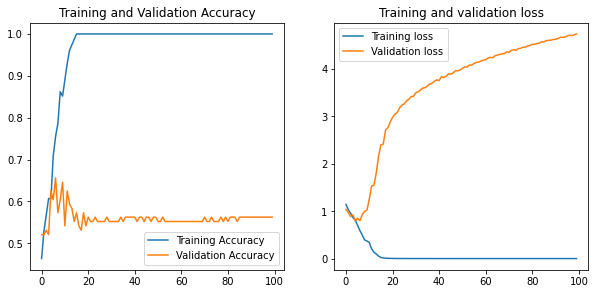

In [15]:
#Visualizando o resultado do treinamento
ac= train_model.history['accuracy']
v_ac= train_model.history['val_accuracy']
vl= train_model.history['loss']
v_l= train_model.history['val_loss']

e_range= range(epochs)

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.plot(e_range, ac, label= 'Training Accuracy')
plt.plot(e_range, v_ac, label= 'Validation Accuracy')
plt.legend(loc= 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(e_range, vl, label= 'Training loss')
plt.plot(e_range, v_l, label= 'Validation loss')
plt.legend(loc= 'upper left')
plt.title('Training and validation loss')
plt.show()

In [16]:
#Aumentando a quantidade de dados , manipulando os já existentes 
#para melhorar a precisão do modelo

more_data= keras.Sequential([layers.RandomFlip('horizontal', 
                                               input_shape= (img_height,
                                                            img_width, 3)),
                            layers.RandomRotation(0.1),
                            layers.RandomZoom(0.1)])

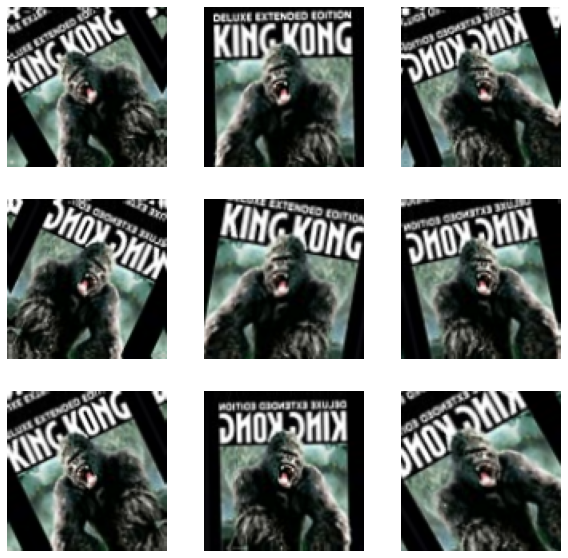

In [17]:
#Visualizando as imagens modificadas
plt.figure(figsize=(10, 10))
for imgs, _ in train.take(1):
    for i in range(9):
        ag_imgs= more_data(imgs)
        ax= plt.subplot(3,3, i + 1)
        plt.imshow(ag_imgs[0].numpy().astype('uint8'))
        plt.axis('off')

In [18]:
#Novo modelo

model= Sequential([
    more_data,
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding= 'same', activation= 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding= 'same', activation= 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding= 'same', activation= 'relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation= 'relu'),
    layers.Dense(num_classes)
])

In [19]:
#Compilando o modelo

model.compile(optimizer= 'adam',
             loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True),
             metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 100, 100, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 100, 100, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 50, 50, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 50, 50, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                  

In [21]:
epochs= 100
n_model= model.fit(train, validation_data= validation, epochs= epochs)

Epoch 1/100
12/12 [==============================] - 3s 200ms/step - loss: 1.1083 - accuracy: 0.4167 - val_loss: 1.0282 - val_accuracy: 0.5208
Epoch 2/100
12/12 [==============================] - 2s 188ms/step - loss: 1.0414 - accuracy: 0.5156 - val_loss: 0.9685 - val_accuracy: 0.5729
Epoch 3/100
12/12 [==============================] - 2s 186ms/step - loss: 0.9427 - accuracy: 0.5964 - val_loss: 0.8746 - val_accuracy: 0.6042
Epoch 4/100
12/12 [==============================] - 2s 184ms/step - loss: 0.9126 - accuracy: 0.5807 - val_loss: 0.8496 - val_accuracy: 0.6354
Epoch 5/100
12/12 [==============================] - 2s 187ms/step - loss: 0.8757 - accuracy: 0.6172 - val_loss: 0.8054 - val_accuracy: 0.6771
Epoch 6/100
12/12 [==============================] - 2s 191ms/step - loss: 0.8373 - accuracy: 0.6146 - val_loss: 0.8632 - val_accuracy: 0.5833
Epoch 7/100
12/12 [==============================] - 2s 186ms/step - loss: 0.8163 - accuracy: 0.6667 - val_loss: 0.7458 - val_accuracy: 0.6875

Epoch 58/100
12/12 [==============================] - 3s 211ms/step - loss: 0.1555 - accuracy: 0.9453 - val_loss: 1.0640 - val_accuracy: 0.7188
Epoch 59/100
12/12 [==============================] - 2s 182ms/step - loss: 0.1046 - accuracy: 0.9609 - val_loss: 1.1102 - val_accuracy: 0.6979
Epoch 60/100
12/12 [==============================] - 2s 182ms/step - loss: 0.1198 - accuracy: 0.9479 - val_loss: 1.2212 - val_accuracy: 0.6875
Epoch 61/100
12/12 [==============================] - 2s 184ms/step - loss: 0.0797 - accuracy: 0.9740 - val_loss: 1.1343 - val_accuracy: 0.7083
Epoch 62/100
12/12 [==============================] - 2s 180ms/step - loss: 0.0897 - accuracy: 0.9740 - val_loss: 1.1194 - val_accuracy: 0.6667
Epoch 63/100
12/12 [==============================] - 2s 180ms/step - loss: 0.0802 - accuracy: 0.9661 - val_loss: 1.1686 - val_accuracy: 0.7083
Epoch 64/100
12/12 [==============================] - 2s 196ms/step - loss: 0.0629 - accuracy: 0.9714 - val_loss: 1.2694 - val_accuracy:

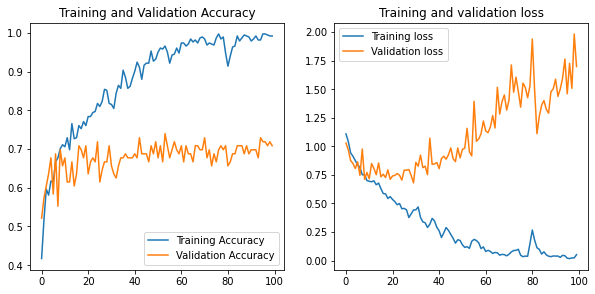

In [22]:
#Visualizando o resultado do novo treinamento
ac= n_model.history['accuracy']
v_ac= n_model.history['val_accuracy']
vl= n_model.history['loss']
v_l= n_model.history['val_loss']

e_range= range(epochs)

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.plot(e_range, ac, label= 'Training Accuracy')
plt.plot(e_range, v_ac, label= 'Validation Accuracy')
plt.legend(loc= 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(e_range, vl, label= 'Training loss')
plt.plot(e_range, v_l, label= 'Validation loss')
plt.legend(loc= 'upper left')
plt.title('Training and validation loss')
plt.show()

In [39]:
#Utilizando novas imagens dos filmes para testar a rede
user= input('Insira o caminho da imagem do King Kong: ')

Insira o caminho da imagem: /home/fernando/Downloads/images.jpeg


In [40]:
img= tf.keras.utils.load_img(user, target_size= (img_height, img_width))
iarray= tf.keras.utils.img_to_array(img)
iarray= tf.expand_dims(iarray, 0)
prediction= model.predict(iarray)
score= tf.nn.softmax(prediction[0])

print('Esta imagem pertence a {} com {:.2f} % de precisão '.format(classes[np.argmax(score)], 100 * np.max(score)))

Esta imagem pertence a King Kong (2005) com 99.46 % de precisão 


(-0.5, 99.5, 99.5, -0.5)

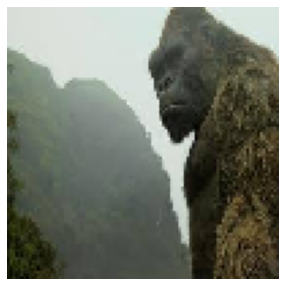

In [41]:
#Visualizando a imagem classificada
plt.figure(figsize= (5,5))
plt.imshow(img)
plt.axis('off')